# Constituent Parsing Exercises



In the lecture we took a look at a simple tokenizer and sentence segmenter. In this exercise we will expand our understanding of the problem by asking a few important questions, and looking at the problem from a different perspectives.

##  <font color='green'>Setup 1</font>: Load Libraries

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %cd .. 
import sys
sys.path.append("..")
import math 
import statnlpbook.util as util
import statnlpbook.parsing as parsing

ModuleNotFoundError: No module named 'mpld3'

## <font color='blue'>Task 1</font>: Understanding parsing

Be sure you understand [grammatical categories and structures](http://webdelprofesor.ula.ve/humanidades/azapata/materias/english_4/grammatical_categories_structures_and_syntactical_functions.pdf) and brush up on your [grammar skils](http://www.ucl.ac.uk/internet-grammar/intro/intro.htm).

Then re-visit the [Enju online parser](http://www.nactem.ac.uk/enju/demo.html), and parse the following sentences...

What is wrong with the parses of the following sentences? Are they correct?
- Fat people eat accumulates.
- The fat that people eat accumulates in their bodies.
- The fat that people eat is accumulating in their bodies.

What about these, is the problem in the parser or in the sentence?
  - The old man the boat.
  - The old people man the boat.  

These were examples of garden path sentences, find out what that means.

What about these sentences? Are their parses correct?
  - Time flies like an arrow; fruit flies like a banana.
  - We saw her duck.

## <font color='blue'>Task 2</font>: Parent Annotation



Reminisce the lecture notes in parsing, and the mentioned parent annotation. (grand)*parents, matter - knowing who the parent is in a tree gives a bit of context information which can later help us with smoothing probabilities, and approaching context-dependent parsing.

in that case, each non-terminal node should know it's parent. We'll do this exercise on a single tree, just to play around a bit with trees and their labeling.


Given the following tree:

In [2]:
x = ('S', [('Subj', ['He']), ('VP', [('Verb', ['shot']), ('Obj', ['the', 'elephant']), ('PP', ['in', 'his', 'pyjamas'])])])
parsing.render_tree(x)

NameError: name 'parsing' is not defined

We construct the `annotate_parents` function which will take that tree, and annotate its parents:

In [4]:
def annotate_parents(tree, parent="null"):
    if isinstance(tree, tuple):
        children = [annotate_parents(child, tree[0]) for child in tree[1]]
        return (tree[0] + "^" + parent, children)
    else:
        return tree

The final annotation result looks like this:

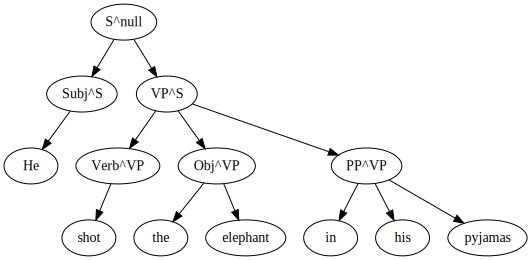

In [5]:
parsing.render_tree(annotate_parents(x))